# Model Evaluation Technique: Confusion Matrix Explained with Pregnancy Tests


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

### What is Confusion Matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.

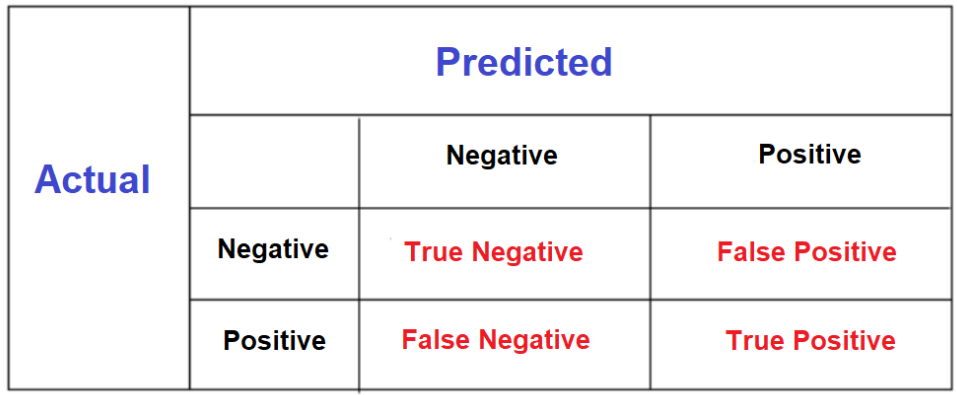


## Lets do Pregnency Test - for Women & but "Men"???

__This will be interesting:__
> - Women can be actually pregnant or not pregnant
> - Women can be predicted to be pregnant or not pregnant
> - Men can actually never get pregnant
> - But what if our predictions show men are pregnant?

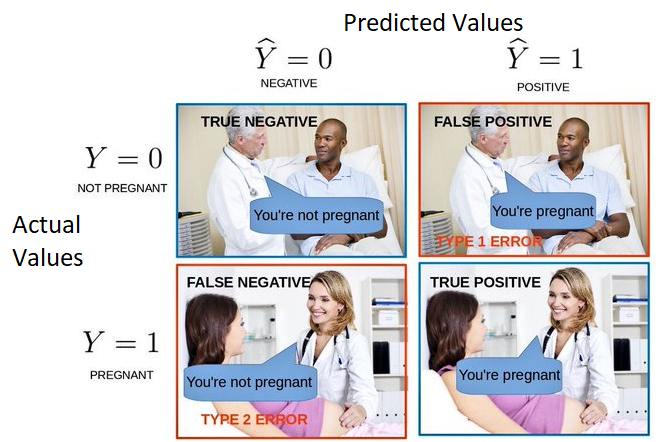


In [3]:
df = pd.DataFrame(columns=['sex','tested','test_cost','pregnant','medication'], index=range(1,2001))
df["pregnant"] = np.random.choice(["yes", "no"], len(df))
df["tested"] = np.random.choice(["yes", "no"], len(df))
df["test_cost"] = np.random.randint(1,5, len(df)) * 5
df["sex"] = np.random.choice(["male", "female"], len(df))
df["medication"] = np.random.choice(["yes", "no"], len(df))
df.loc[df['sex'] == 'male', 'pregnant'] = 'no'
df.loc[df['sex'] == 'female', 'pregnant'] = 'yes'
df.loc[df['pregnant'] == 'no', 'medication'] = 'no'
df.sample(20)

,sex,tested,test_cost,pregnant,medication
96,female,yes,5,yes,yes
759,male,no,20,no,no
1401,male,no,15,no,no
994,male,yes,15,no,no
461,female,yes,10,yes,yes
1318,male,yes,10,no,no
1660,male,no,10,no,no
1802,male,no,10,no,no
409,male,no,5,no,no
761,female,no,5,yes,no


In [4]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [5]:
df.pregnant.unique()

array(['yes', 'no'], dtype=object)

In [6]:
group = df.groupby('sex')
df1 = group.apply(lambda x: x['pregnant'].unique())
df1

sex
female    [yes]
male       [no]
dtype: object

In [7]:
total_female = df.loc[df['sex'] == 'female',:].shape[0] 
total_female_pregnant = df.loc[df['pregnant'] == 'yes',:].shape[0] 
total_male = df.loc[df['sex'] == 'male',:].shape[0] 

print ("Total female = {}, Pregnant Female = {}, Total male = {}: obviously not pregnant, but all female are pregnant".format(total_female,total_female_pregnant,total_male))

Total female = 978, Pregnant Female = 978, Total male = 1022: obviously not pregnant, but all female are pregnant


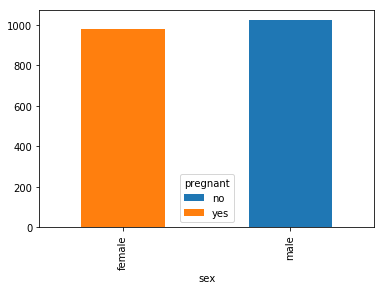

In [8]:
df.groupby(['sex', 'pregnant']).size().unstack().plot(kind='bar', stacked=True)

In [9]:
df1 = df.copy(deep=True)

In [10]:
df1 = pd.get_dummies(df1, columns=['sex','pregnant','tested','test_cost','medication'], drop_first=True) 

In [11]:
df1.sample(20)

,sex_male,pregnant_yes,tested_yes,test_cost_10,test_cost_15,test_cost_20,medication_yes
438,1,0,0,0,1,0,0
171,0,1,1,0,0,1,0
383,1,0,1,0,1,0,0
955,1,0,0,0,1,0,0
944,0,1,0,0,1,0,1
1282,0,1,0,0,1,0,0
1446,0,1,0,0,0,0,0
262,0,1,1,1,0,0,1
395,0,1,0,1,0,0,0
361,0,1,1,0,0,0,1


### Preparing X and y using pandas for FEMALE

In [12]:
df_f = df1[df1['sex_male'] == 0]
df_f.sample(5)

,sex_male,pregnant_yes,tested_yes,test_cost_10,test_cost_15,test_cost_20,medication_yes
972,0,1,1,1,0,0,0
432,0,1,0,0,1,0,1
1761,0,1,0,0,0,0,1
1282,0,1,0,0,1,0,0
1095,0,1,1,0,0,1,0


In [13]:
X = df_f.loc[:,df1.columns != 'tested_yes']
y = df_f.tested_yes              

In [14]:
df_f.shape

(978, 7)

### Splitting X and y into training and test datasets.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
print(X_train.shape)
print(y_train.shape)

(782, 6)
(782,)


In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred_train = logreg.predict(X_train)  

In [19]:
y_pred_test = logreg.predict(X_test)   

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  54  45
1  56  41


In [21]:
confusion_matrix.index = ['Not Pregnant','Pregnant']
confusion_matrix.columns = ['Tested: No','Tested: Yes']
confusion_matrix

,Tested: No,Tested: Yes
Not Pregnant,54,45
Pregnant,56,41


### Preparing X and y using pandas for Male

In [22]:
df_f = df1[df1['sex_male'] == 1]
df_f.sample(5)

,sex_male,pregnant_yes,tested_yes,test_cost_10,test_cost_15,test_cost_20,medication_yes
1345,1,0,0,0,1,0,0
221,1,0,0,0,1,0,0
140,1,0,0,0,0,0,0
1678,1,0,0,1,0,0,0
1654,1,0,0,1,0,0,0


In [23]:
X = df_f.loc[:,df1.columns != 'tested_yes']
y = df_f.tested_yes    

In [24]:
df_f.shape

(1022, 7)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)

(817, 6)
(817,)


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)   

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  48  50
1  50  57


In [29]:
confusion_matrix.index = ['Not Pregnant','Pregnant']
confusion_matrix.columns = ['Tested: No','Tested: Yes']
confusion_matrix

,Tested: No,Tested: Yes
Not Pregnant,48,50
Pregnant,50,57
